# Sourcing and Analyzing Time Series

#### The script contains the following:

1. Importing Libraries
2. Subsetting, Wrangling, and Cleaning Data
3. Time-Series Analysis: Decompostion
4. Testing for Stationary
5. Stationarizing Data

## 1. Importing Libraries

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
# Creating a path 

path = r'/Users/tsique/Desktop/CareerFoundry - Data Analytics/3 Immersion/Final Project'

In [12]:
# Importing dataframe

month_shoot = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'monthly_shootings.csv'))

In [13]:
# Checking dataframe

month_shoot

,Dates,Number of Deaths
0,01/01/2015,76
1,02/01/2015,77
2,03/01/2015,92
3,04/01/2015,84
4,05/01/2015,71
...,...,...
88,05/01/2022,92
89,06/01/2022,93
90,07/01/2022,95
91,08/01/2022,75


## 2. Subsetting, Wrangling, and Cleaning Data

### A subset dataframe was created from the cleaned dataset and is being used now.

In [6]:
# Checking for missing values

month_shoot.isnull().sum()

Dates               0
Number of Deaths    0
dtype: int64

In [7]:
# Checking for duplicates

dups = month_shoot.duplicated()
dups.sum()

0

In [15]:
# Set the "Date" column as the index

from datetime import datetime

month_shoot['datetime'] = pd.to_datetime(month_shoot['Dates'])
month_shoot = month_shoot.set_index('datetime') # Set the datetime as the index of the dataframe.
month_shoot.drop(['Dates'], axis = 1, inplace = True) # Drop the "Date" column.
month_shoot.head()

,Number of Deaths
datetime,
2015-01-01,76
2015-02-01,77
2015-03-01,92
2015-04-01,84
2015-05-01,71


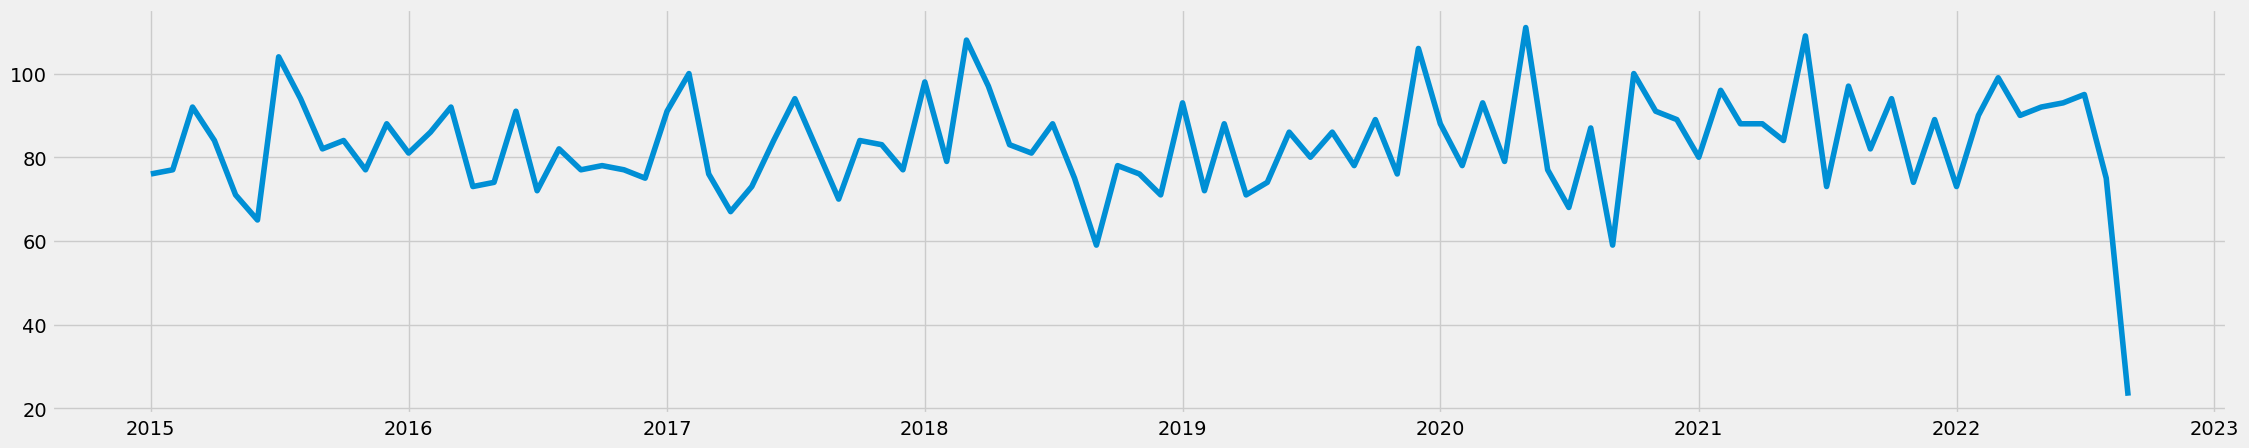

In [19]:
# Plot the new data set

plt.figure(figsize=(25,5), dpi=100)
plt.plot(month_shoot)

### The data for September 2022 only contains dates from the first week.

## 3. Time-Series Analysis: Decomposition

In [21]:
# Decompose the time series using an multiplicative model

decomposition = sm.tsa.seasonal_decompose(month_shoot, model='multiplicative')

In [22]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

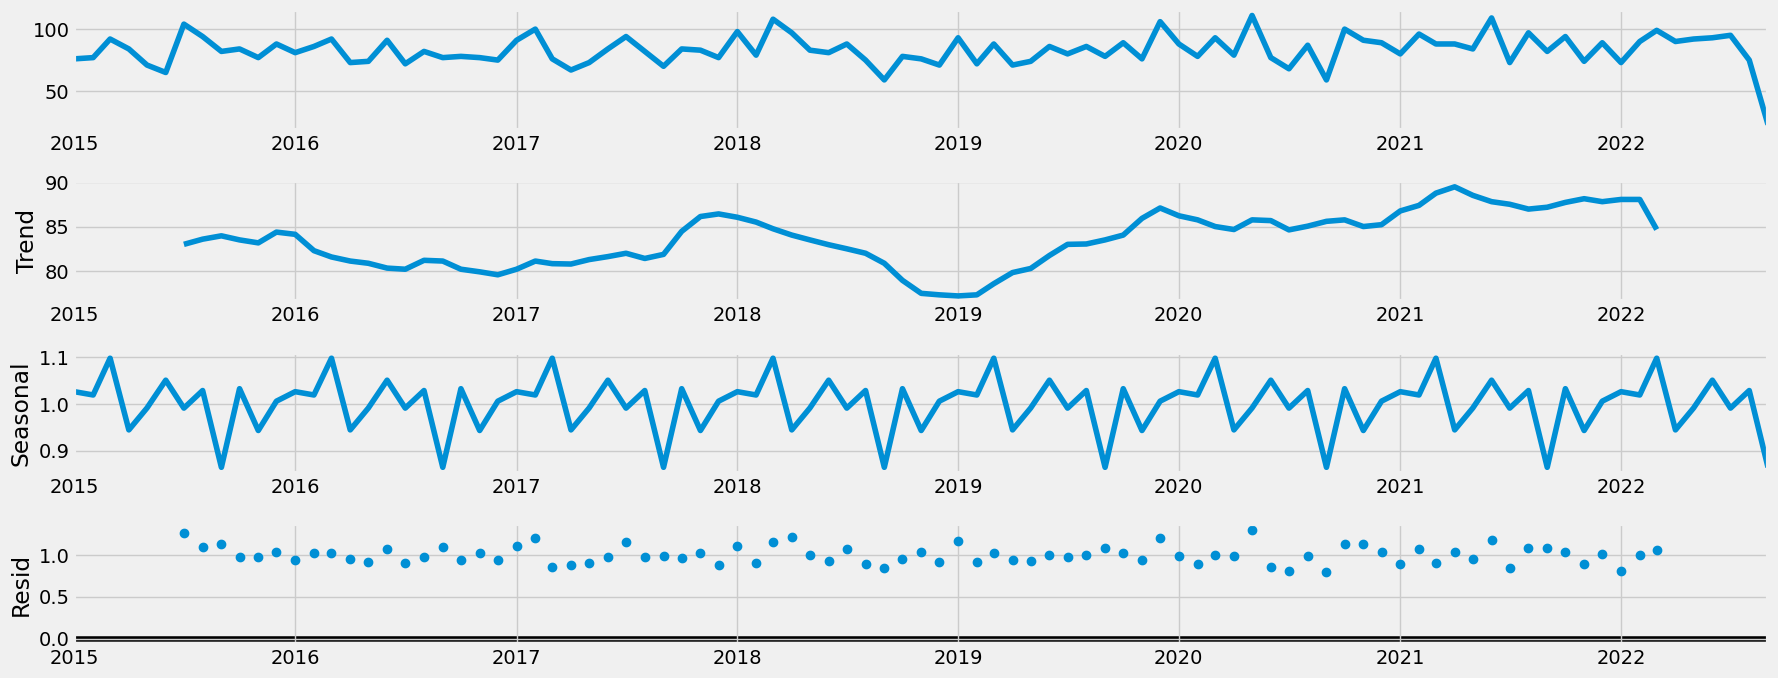

In [23]:
# Plot the separate components

decomposition.plot()
plt.show()

## 4. Testing for Stationarity 

In [24]:
# Import the adfuller() function

from statsmodels.tsa.stattools import adfuller 

# Define the function

def dickey_fuller(timeseries): 
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series

dickey_fuller(month_shoot['Number of Deaths'])

Dickey-Fuller Stationarity test:
Test Statistic                -8.339734e+00
p-value                        3.200153e-13
Number of Lags Used            0.000000e+00
Number of Observations Used    9.200000e+01
Critical Value (1%)           -3.503515e+00
Critical Value (5%)           -2.893508e+00
Critical Value (10%)          -2.583824e+00
dtype: float64


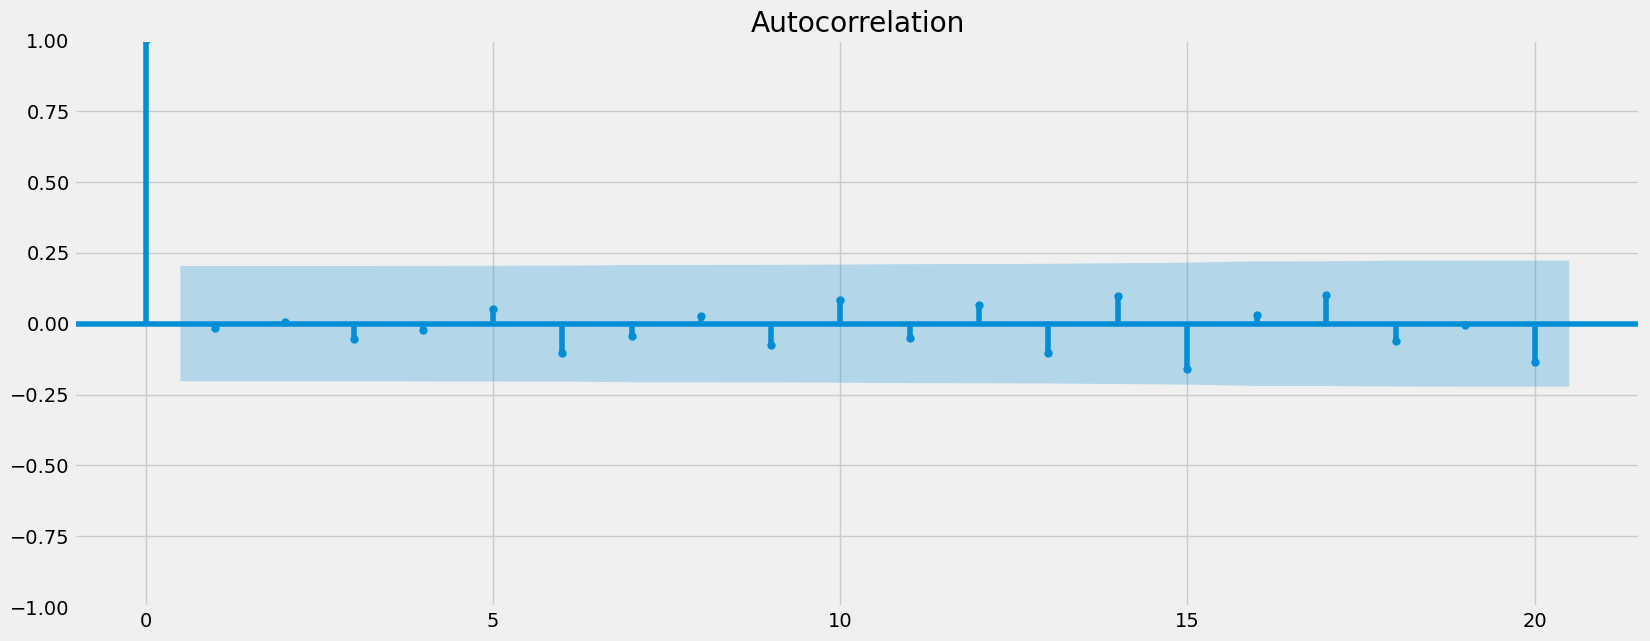

In [25]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(month_shoot)
plt.show()